In [2]:
!pip install scikit-learn
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 2.3 MB/s eta 0:00:00
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 895.9/895.9 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
     ---------------------------------------- 3.7/3.7 MB 7.5 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached tenso

# Clusterização e classificação

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.cluster import KMeans
import numpy as np
import warnings

warnings.filterwarnings('ignore')

sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [139]:
data_normalized = pd.read_csv('../tmp/data/data_normalized.csv')
data_normalized.drop(['Status'], axis=1, inplace=True)

data = pd.read_csv('https://storage.googleapis.com/data-ia-final/data.csv')
target = data['Status']
data.drop(['ID', 'Status'], axis=1, inplace=True)

### Dataset normalizado

In [26]:
data_normalized.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,term,Neg_ammortization,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_>74,Region_North,Region_Central,Region_South,Region_North-East
0,1.0,0.0,0,0,1,206500,3.99,2596.45,360.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
1,1.0,0.0,0,0,0,466500,3.99,2596.45,360.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
2,1.0,0.0,0,0,1,656500,3.99,2596.45,360.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1.0,0.0,0,0,0,106500,3.99,2596.45,240.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
4,1.0,0.0,0,0,0,406500,3.99,2596.45,360.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0


In [27]:
print(data_normalized.shape)
print(data.shape)

(148670, 51)
(148670, 32)


In [28]:
data.columns

Index(['year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co_applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1'],
      dtype='object')

In [29]:
print("year: ", len(data['year'].unique()))
print("loan_limit: ", len(data['loan_limit'].unique()))
print("Gender: ", len(data['Gender'].unique()))
print("approv_in_adv: ", len(data['approv_in_adv'].unique()))
print("loan_type: ", len(data['loan_type'].unique()))
print("loan_purpose: ", len(data['loan_purpose'].unique()))
print("Credit_Worthiness: ", len(data['Credit_Worthiness'].unique()))
print("open_credit: ", len(data['open_credit'].unique()))
print("business_or_commercial: ", len(data['business_or_commercial'].unique()))
print("rate_of_interest: ", len(data['rate_of_interest'].unique()))
print("loan_amount: ", len(data['loan_amount'].unique()))
print("rate_of_interest: ", len(data['rate_of_interest'].unique()))
print("Interest_rate_spread: ", len(data['Interest_rate_spread'].unique()))
print("Upfront_charges: ", len(data['Upfront_charges'].unique()))
print("term: ", len(data['term'].unique()))
print("Neg_ammortization: ", len(data['Neg_ammortization'].unique()))
print("interest_only: ", len(data['interest_only'].unique()))
print("lump_sum_payment: ", len(data['lump_sum_payment'].unique()))
print("property_value: ", len(data['property_value'].unique()))
print("construction_type: ", len(data['construction_type'].unique()))
print("occupancy_type: ", len(data['occupancy_type'].unique()))
print("Secured_by: ", len(data['Secured_by'].unique()))
print("total_units: ", len(data['total_units'].unique()))
print("income: ", len(data['income'].unique()))
print("credit_type: ", len(data['credit_type'].unique()))
print("Credit_Score: ", len(data['Credit_Score'].unique()))
print("co_applicant_credit_type: ", len(data['co_applicant_credit_type'].unique()))
print("age: ", len(data['age'].unique()))
print("submission_of_application: ", len(data['submission_of_application'].unique()))
print("LTV: ", len(data['LTV'].unique()))
print("Region: ", len(data['Region'].unique()))
print("Security_Type: ", len(data['Security_Type'].unique()))
print("dtir1: ", len(data['dtir1'].unique()))

year:  1
loan_limit:  3
Gender:  4
approv_in_adv:  3
loan_type:  3
loan_purpose:  5
Credit_Worthiness:  2
open_credit:  2
business_or_commercial:  2
rate_of_interest:  132
loan_amount:  211
rate_of_interest:  132
Interest_rate_spread:  22517
Upfront_charges:  58272
term:  27
Neg_ammortization:  3
interest_only:  2
lump_sum_payment:  2
property_value:  386
construction_type:  2
occupancy_type:  3
Secured_by:  2
total_units:  4
income:  1002
credit_type:  4
Credit_Score:  401
co_applicant_credit_type:  2
age:  8
submission_of_application:  3
LTV:  8485
Region:  4
Security_Type:  2
dtir1:  58


In [140]:
target

0         1
1         1
2         1
3         1
4         1
         ..
148665    0
148666    0
148667    1
148668    0
148669    1
Name: Status, Length: 148670, dtype: int64

In [32]:
data.drop(['Interest_rate_spread', 'Upfront_charges'], axis=1, inplace=True)

In [33]:
data.shape

(148670, 30)

In [36]:
data_normalized.drop(['Upfront_charges'], axis=1, inplace=True)

In [37]:
data_normalized.columns

Index(['loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'Secured_by', 'total_units',
       'income', 'Credit_Score', 'co_applicant_credit_type',
       'submission_of_application', 'LTV', 'Security_Type', 'dtir1',
       'GenderMale', 'GenderFemale', 'GenderJoint', 'loan_type1', 'loan_type2',
       'loan_type3', 'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'occupancy_type_pr', 'occupancy_type_ir',
       'occupancy_type_sr', 'credit_type_equi', 'credit_type_crif',
       'credit_type_cib', 'credit_type_exp', 'age_<25', 'age_25-34',
       'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74', 'age_>74',
       'Region_North', 'Region_Central', 'Region_South', 'Region_North-East'],
      dtype='object')

In [41]:
X = data_normalized
cols = X.columns

In [42]:
from sklearn.preprocessing import MinMaxScaler
X = data_normalized
ms = MinMaxScaler()

X = ms.fit_transform(X)

In [43]:
X = pd.DataFrame(X, columns=[cols])

In [44]:
X.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,term,Neg_ammortization,interest_only,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_>74,Region_North,Region_Central,Region_South,Region_North-East
0,1.0,0.0,0.0,0.0,1.0,0.053371,0.49875,1.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.126404,0.49875,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.179775,0.49875,1.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.025281,0.49875,0.545455,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.109551,0.49875,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## KMeans

In [147]:
from sklearn.cluster import KMeans

In [49]:
Y = target

In [45]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

C:\Users\saofagar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [46]:
kmeans.cluster_centers_

array([[9.11099558e-01, 1.58387882e-01, 4.33750030e-02, 3.87551102e-03,
        1.46052414e-01, 8.79124800e-02, 5.04785695e-01, 9.13988513e-01,
        1.02145710e-01, 4.81012359e-02, 2.11144457e-02, 2.86765044e-02,
        2.83573977e-04, 9.99716426e-01, 7.03421005e-03, 1.18452445e-02,
        4.98742586e-01, 5.01276083e-01, 5.87659806e-01, 9.29631982e-03,
        9.99716426e-01, 5.87055945e-01, 3.73715055e-01, 2.46673914e-01,
        3.71470095e-01, 7.51683720e-01, 1.46052414e-01, 1.02263866e-01,
        2.61136186e-01, 2.14452820e-02, 3.63730888e-01, 3.52612425e-01,
        9.34896141e-01, 4.19453175e-02, 2.31585415e-02, 9.67696198e-02,
        2.98922419e-01, 3.28555900e-01, 2.75752062e-01, 1.05513151e-02,
        1.32641728e-01, 2.15008153e-01, 2.29954864e-01, 2.19545336e-01,
        1.43098518e-01, 4.92000851e-02, 8.82883947e-01, 1.02653780e-01,
        3.88578059e-14, 1.44622728e-02],
       [9.09457180e-01, 1.52039478e-01, 4.14610532e-02, 3.56049722e-03,
        1.31191830e-01,

In [47]:
kmeans.inertia_

676666.3999112381

In [50]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

Result: 82101 out of 148670 samples were correctly labeled.


In [52]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))

Accuracy score: 0.55


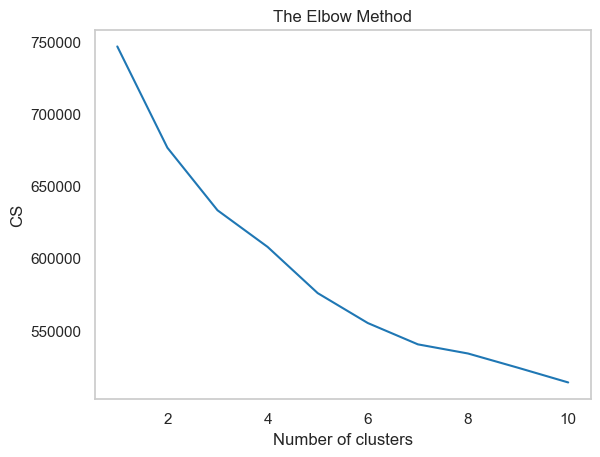

In [55]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))

Result: 66569 out of 148670 samples were correctly labeled.
Accuracy score: 0.45


In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))

Result: 47324 out of 148670 samples were correctly labeled.
Accuracy score: 0.32


## Testando com o dataset original

In [144]:
data = pd.read_csv('https://storage.googleapis.com/data-ia-final/data.csv')
target = data['Status']
data.drop(['ID', 'year'], axis=1, inplace=True)

In [145]:
X_original = data
X_original.head()
print(target)

0         1
1         1
2         1
3         1
4         1
         ..
148665    0
148666    0
148667    1
148668    0
148669    1
Name: Status, Length: 148670, dtype: int64


In [146]:
X_original['Status']

0         1
1         1
2         1
3         1
4         1
         ..
148665    0
148666    0
148667    1
148668    0
148669    1
Name: Status, Length: 148670, dtype: int64

In [148]:
Y = X_original['Status']
print(Y)

0         1
1         1
2         1
3         1
4         1
         ..
148665    0
148666    0
148667    1
148668    0
148669    1
Name: Status, Length: 148670, dtype: int64


In [155]:
X_original.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region              

In [156]:
X_original.shape

(148670, 32)

In [157]:
X_original = X_original[X_original['loan_limit'].notna()]
X_original = X_original[X_original['approv_in_adv'].notna()]
X_original = X_original[X_original['loan_purpose'].notna()]
X_original = X_original[X_original['term'].notna()]
X_original = X_original[X_original['Neg_ammortization'].notna()]
X_original = X_original[X_original['age'].notna()]
X_original = X_original[X_original['submission_of_application'].notna()]

In [158]:
X_original.shape

(143942, 32)

In [159]:
X_original['rate_of_interest'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)
X_original['Interest_rate_spread'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)
X_original['Upfront_charges'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)
X_original['property_value'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)
X_original['income'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)
X_original['LTV'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)
X_original['dtir1'].fillna(value=X_original['rate_of_interest'].mean(), inplace=True)

In [160]:
X_original.head()
X_original.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co_applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [161]:
print("loan_limit: ", len(X_original['loan_limit'].unique()))
print("Gender: ", len(X_original['Gender'].unique()))
print("approv_in_adv: ", len(X_original['approv_in_adv'].unique()))
print("loan_type: ", len(X_original['loan_type'].unique()))
print("loan_purpose: ", len(X_original['loan_purpose'].unique()))
print("Credit_Worthiness: ", len(X_original['Credit_Worthiness'].unique()))
print("open_credit: ", len(X_original['open_credit'].unique()))
print("business_or_commercial: ", len(X_original['business_or_commercial'].unique()))
print("rate_of_interest: ", len(X_original['rate_of_interest'].unique()))
print("loan_amount: ", len(X_original['loan_amount'].unique()))
print("rate_of_interest: ", len(X_original['rate_of_interest'].unique()))
print("Interest_rate_spread: ", len(X_original['Interest_rate_spread'].unique()))
print("Upfront_charges: ", len(X_original['Upfront_charges'].unique()))
print("term: ", len(X_original['term'].unique()))
print("Neg_ammortization: ", len(X_original['Neg_ammortization'].unique()))
print("interest_only: ", len(X_original['interest_only'].unique()))
print("lump_sum_payment: ", len(X_original['lump_sum_payment'].unique()))
print("property_value: ", len(X_original['property_value'].unique()))
print("construction_type: ", len(X_original['construction_type'].unique()))
print("occupancy_type: ", len(X_original['occupancy_type'].unique()))
print("Secured_by: ", len(X_original['Secured_by'].unique()))
print("total_units: ", len(X_original['total_units'].unique()))
print("income: ", len(X_original['income'].unique()))
print("credit_type: ", len(X_original['credit_type'].unique()))
print("Credit_Score: ", len(X_original['Credit_Score'].unique()))
print("co_applicant_credit_type: ", len(X_original['co_applicant_credit_type'].unique()))
print("age: ", len(X_original['age'].unique()))
print("submission_of_application: ", len(X_original['submission_of_application'].unique()))
print("LTV: ", len(X_original['LTV'].unique()))
print("Region: ", len(X_original['Region'].unique()))
print("Security_Type: ", len(X_original['Security_Type'].unique()))
print("dtir1: ", len(X_original['dtir1'].unique()))

loan_limit:  2
Gender:  4
approv_in_adv:  2
loan_type:  3
loan_purpose:  4
Credit_Worthiness:  2
open_credit:  2
business_or_commercial:  2
rate_of_interest:  129
loan_amount:  210
rate_of_interest:  129
Interest_rate_spread:  22418
Upfront_charges:  56723
term:  25
Neg_ammortization:  2
interest_only:  2
lump_sum_payment:  2
property_value:  383
construction_type:  2
occupancy_type:  3
Secured_by:  2
total_units:  4
income:  990
credit_type:  4
Credit_Score:  401
co_applicant_credit_type:  2
age:  7
submission_of_application:  2
LTV:  8423
Region:  4
Security_Type:  2
dtir1:  58


In [162]:
data.drop(['Interest_rate_spread', 'Upfront_charges'], axis=1, inplace=True)

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_original['loan_limit'] = le.fit_transform(X_original['loan_limit'])
X_original['Gender'] = le.fit_transform(X_original['Gender'])
X_original['approv_in_adv'] = le.fit_transform(X_original['approv_in_adv'])
X_original['loan_type'] = le.fit_transform(X_original['loan_type'])
X_original['loan_purpose'] = le.fit_transform(X_original['loan_purpose'])
X_original['Credit_Worthiness'] = le.fit_transform(X_original['Credit_Worthiness'])
X_original['open_credit'] = le.fit_transform(X_original['open_credit'])
X_original['business_or_commercial'] = le.fit_transform(X_original['business_or_commercial'])
X_original['credit_type'] = le.fit_transform(X_original['credit_type'])
X_original['co_applicant_credit_type'] = le.fit_transform(X_original['co_applicant_credit_type'])
X_original['submission_of_application'] = le.fit_transform(X_original['submission_of_application'])
X_original['Region'] = le.fit_transform(X_original['Region'])
X_original['Security_Type'] = le.fit_transform(X_original['Security_Type'])
X_original['Neg_ammortization'] = le.fit_transform(X_original['Neg_ammortization'])
X_original['interest_only'] = le.fit_transform(X_original['interest_only'])
X_original['construction_type'] = le.fit_transform(X_original['construction_type'])
X_original['occupancy_type'] = le.fit_transform(X_original['occupancy_type'])
X_original['Secured_by'] = le.fit_transform(X_original['Secured_by'])
X_original['age'] = le.fit_transform(X_original['age'])
X_original['lump_sum_payment'] = le.fit_transform(X_original['lump_sum_payment'])
X_original['total_units'] = data_normalized['total_units']

In [164]:
pd.set_option('display.max_columns', None)
X_original.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,2,0,1,0,0,0,0,206500,4.039763,4.039763,4.039763,360.0,1,1,0,4.039763,1,1,0,1,4980.0,2,552,1,3,1,4.039763,0,1,1,4.039763
1,0,2,0,2,3,0,0,1,466500,4.039763,4.039763,4.039763,360.0,1,1,1,4.039763,1,1,0,1,0.0,2,765,1,2,1,4.039763,0,1,1,4.039763
2,0,2,0,1,2,0,0,0,656500,4.039763,4.039763,4.039763,360.0,1,1,1,4.039763,1,1,0,1,8640.0,2,880,1,1,1,4.039763,0,1,1,4.039763
3,0,2,0,0,3,0,0,1,106500,4.039763,4.039763,4.039763,240.0,1,1,0,4.039763,1,1,0,1,1680.0,2,880,1,2,1,4.039763,2,1,1,4.039763
4,0,2,0,2,2,0,0,1,406500,4.039763,4.039763,4.039763,360.0,1,1,1,4.039763,1,1,0,1,7560.0,2,768,1,2,0,4.039763,0,1,1,4.039763


In [165]:
target = X_original['Status']
X_original.drop(['Status'], axis=1, inplace=True)

In [166]:
target

0         1
1         1
2         1
3         1
4         1
         ..
148665    0
148666    0
148667    1
148668    0
148669    1
Name: Status, Length: 143942, dtype: int64

In [167]:
Y_original = target

In [168]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X_original)

KMeans(n_clusters=2, random_state=0)

In [169]:
kmeans.cluster_centers_

array([[1.22326048e-01, 1.47568667e+00, 1.33678276e-01, 1.88972121e-01,
        2.11318763e+00, 4.43534893e-02, 9.42157696e-03, 9.55955415e-01,
        5.28491145e+05, 3.96674872e+00, 6.99231994e-01, 2.80202419e+03,
        3.41958143e+02, 9.18397817e-01, 9.43238860e-01, 9.83344917e-01,
        8.81989654e+05, 9.99974258e-01, 9.61000849e-01, 2.57420135e-05,
        1.04571782e+00, 9.80547873e+03, 1.21363297e+00, 7.00419106e+02,
        5.47378176e-01, 2.09578603e+00, 3.73207712e-01, 6.48033469e+01,
        1.44361212e+00, 9.99974258e-01, 3.52192570e+01],
       [4.76426091e-02, 1.65504544e+00, 1.68885294e-01, 3.93187116e-01,
        1.80618488e+00, 4.36557400e-02, 1.64612969e-03, 8.26785289e-01,
        2.59118869e+05, 4.06675120e+00, 1.55006242e+00, 2.21401362e+03,
        3.32545706e+02, 8.93667634e-01, 9.56030258e-01, 9.73956896e-01,
        2.88726170e+05, 9.99695514e-01, 9.76107331e-01, 3.04486417e-04,
        1.01243637e+00, 5.32706575e+03, 1.37780104e+00, 6.99430972e+02,
       

In [170]:
kmeans.inertia_

1.300086100136427e+16

In [171]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(Y_original == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y_original.size))

Result: 64224 out of 143942 samples were correctly labeled.


In [173]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y_original.size)))

Accuracy score: 0.45


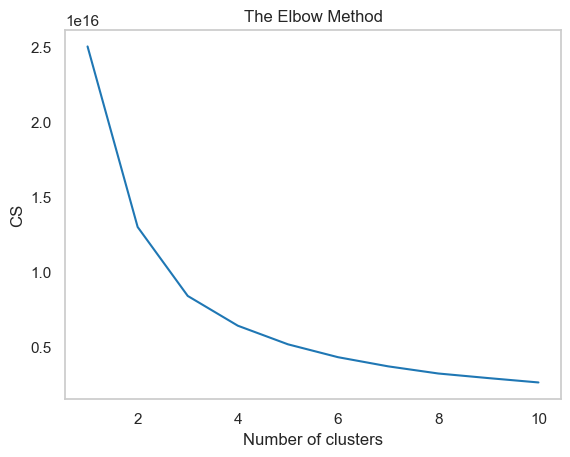

In [174]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_original)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()